In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

In [2]:
energy_floating = pd.read_csv('data/energy_floating.csv')
energy_warehouse = pd.read_csv('data/energy_warehouse.csv')
energy_dangjin = pd.read_csv('data/energy_dangjin.csv')
energy_ulsan = pd.read_csv('data/energy_ulsan.csv')

In [3]:
model_path = 'model'
filename = []
filename.append(os.path.join(model_path, 'floating_checkpoint.h5'))
filename.append(os.path.join(model_path, 'warehouse_checkpoint.h5'))
filename.append(os.path.join(model_path, 'dangjin_checkpoint.h5'))
filename.append(os.path.join(model_path, 'ulsan_checkpoint.h5'))

In [4]:
def make_dataset(data, label, window_size=24):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [5]:
def root_mean_squared_error (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
df = energy_floating.copy()
df.head(24)

,time,dangjin_floating,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,1000.0,0.000,-2.000000,55.000000,6.700000,336.000000,1.000000
1,2018-03-02 01:00:00,0.0,1000.0,0.000,-2.666667,55.000000,6.300000,337.000000,1.000000
2,2018-03-02 02:00:00,0.0,1000.0,0.000,-3.333333,55.000000,5.900000,338.000000,1.000000
3,2018-03-02 03:00:00,0.0,1000.0,0.000,-4.000000,55.000000,5.500000,339.000000,1.000000
4,2018-03-02 04:00:00,0.0,1000.0,0.000,-4.333333,56.666667,5.100000,340.666667,1.000000
5,2018-03-02 05:00:00,0.0,1000.0,0.000,-4.666667,58.333333,4.700000,342.333333,1.000000
6,2018-03-02 06:00:00,0.0,1000.0,0.000,-5.000000,60.000000,4.300000,344.000000,1.000000
7,2018-03-02 07:00:00,0.0,1000.0,0.000,-4.000000,58.333333,3.533333,344.333333,1.000000
8,2018-03-02 08:00:00,11.0,1000.0,0.011,-3.000000,56.666667,2.766667,344.666667,1.000000
9,2018-03-02 09:00:00,134.0,1000.0,0.134,-2.000000,55.000000,2.000000,345.000000,1.000000


In [7]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [8]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16796, 24, 5), (4199, 24, 5), (4541, 24, 5), (672, 24, 5))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

epoch = 50

In [11]:
model_0 = Sequential()
model_0.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_0.add(Dense(1, activation='relu'))
model_0.compile(loss='mean_squared_error', optimizer='adam')
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24)                2880      
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[0], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_0 = model_0.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
525/525 [==============================] - 5s 7ms/step - loss: 0.0360 - val_loss: 0.0153

Epoch 00001: val_loss improved from inf to 0.01533, saving model to model\floating_checkpoint.h5
Epoch 2/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0144 - val_loss: 0.0122

Epoch 00002: val_loss improved from 0.01533 to 0.01217, saving model to model\floating_checkpoint.h5
Epoch 3/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0116 - val_loss: 0.0109

Epoch 00003: val_loss improved from 0.01217 to 0.01089, saving model to model\floating_checkpoint.h5
Epoch 4/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0106 - val_loss: 0.0106

Epoch 00004: val_loss improved from 0.01089 to 0.01062, saving model to model\floating_checkpoint.h5
Epoch 5/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0101 - val_loss: 0.0096

Epoch 00005: val_loss improved from 0.01062 to 0.00957, saving model to model\floating_checkpoi

In [13]:
floating_pred = model_0.predict(pred_feature)

In [14]:
df = energy_warehouse.copy()
df.head(24)

,time,dangjin_warehouse,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,700.0,0.000000,-2.000000,55.000000,6.700000,336.000000,1.000000
1,2018-03-02 01:00:00,0.0,700.0,0.000000,-2.666667,55.000000,6.300000,337.000000,1.000000
2,2018-03-02 02:00:00,0.0,700.0,0.000000,-3.333333,55.000000,5.900000,338.000000,1.000000
3,2018-03-02 03:00:00,0.0,700.0,0.000000,-4.000000,55.000000,5.500000,339.000000,1.000000
4,2018-03-02 04:00:00,0.0,700.0,0.000000,-4.333333,56.666667,5.100000,340.666667,1.000000
5,2018-03-02 05:00:00,0.0,700.0,0.000000,-4.666667,58.333333,4.700000,342.333333,1.000000
6,2018-03-02 06:00:00,0.0,700.0,0.000000,-5.000000,60.000000,4.300000,344.000000,1.000000
7,2018-03-02 07:00:00,0.0,700.0,0.000000,-4.000000,58.333333,3.533333,344.333333,1.000000
8,2018-03-02 08:00:00,9.0,700.0,0.012857,-3.000000,56.666667,2.766667,344.666667,1.000000
9,2018-03-02 09:00:00,93.0,700.0,0.132857,-2.000000,55.000000,2.000000,345.000000,1.000000


In [15]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [16]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16776, 24, 5), (4195, 24, 5), (4541, 24, 5), (672, 24, 5))

In [18]:
model_1 = Sequential()
model_1.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_1.add(Dense(1, activation='relu'))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[1], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_1 = model_1.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
525/525 [==============================] - 4s 6ms/step - loss: 0.0674 - val_loss: 0.0605

Epoch 00001: val_loss improved from inf to 0.06046, saving model to model\warehouse_checkpoint.h5
Epoch 2/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0641 - val_loss: 0.0605

Epoch 00002: val_loss improved from 0.06046 to 0.06046, saving model to model\warehouse_checkpoint.h5
Epoch 3/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0640 - val_loss: 0.0605

Epoch 00003: val_loss did not improve from 0.06046
Epoch 4/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0635 - val_loss: 0.0605

Epoch 00004: val_loss did not improve from 0.06046
Epoch 5/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0632 - val_loss: 0.0605

Epoch 00005: val_loss did not improve from 0.06046
Epoch 6/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0640 - val_loss: 0.0605

Epoch 00006: val_loss did not improve fro

In [20]:
warehouse_pred = model_1.predict(pred_feature)

In [21]:
df = energy_dangjin.copy()
df

,time,dangjin,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,1000.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0
1,2018-03-02 01:00:00,0.0,1000.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0
2,2018-03-02 02:00:00,0.0,1000.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0
3,2018-03-02 03:00:00,0.0,1000.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0
4,2018-03-02 04:00:00,0.0,1000.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0
26300,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0
26301,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0


In [22]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [23]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 5), (4204, 24, 5), (4541, 24, 5), (672, 24, 5))

In [25]:
model_2 = Sequential()
model_2.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_2.add(Dense(1, activation='relu'))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[2], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_2 = model_2.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
526/526 [==============================] - 4s 6ms/step - loss: 0.0760 - val_loss: 0.0690

Epoch 00001: val_loss improved from inf to 0.06900, saving model to model\dangjin_checkpoint.h5
Epoch 2/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0711 - val_loss: 0.0507

Epoch 00002: val_loss improved from 0.06900 to 0.05074, saving model to model\dangjin_checkpoint.h5
Epoch 3/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0375 - val_loss: 0.0179

Epoch 00003: val_loss improved from 0.05074 to 0.01791, saving model to model\dangjin_checkpoint.h5
Epoch 4/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0156 - val_loss: 0.0138

Epoch 00004: val_loss improved from 0.01791 to 0.01380, saving model to model\dangjin_checkpoint.h5
Epoch 5/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0139 - val_loss: 0.0145

Epoch 00005: val_loss did not improve from 0.01380
Epoch 6/50
526/526 [============================

526/526 [==============================] - 2s 5ms/step - loss: 0.0090 - val_loss: 0.0094

Epoch 00048: val_loss did not improve from 0.00928
Epoch 49/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0088 - val_loss: 0.0095

Epoch 00049: val_loss did not improve from 0.00928
Epoch 50/50
526/526 [==============================] - 2s 5ms/step - loss: 0.0091 - val_loss: 0.0095

Epoch 00050: val_loss did not improve from 0.00928


In [27]:
dangjin_pred = model_2.predict(pred_feature)

In [28]:
df = energy_ulsan.copy()
df.head(24)

,time,ulsan,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,500.0,0.000,0.000000,40.000000,1.500000,318.000000,2.000000
1,2018-03-02 01:00:00,0.0,500.0,0.000,-0.333333,41.666667,1.600000,314.666667,2.000000
2,2018-03-02 02:00:00,0.0,500.0,0.000,-0.666667,43.333333,1.700000,311.333333,2.000000
3,2018-03-02 03:00:00,0.0,500.0,0.000,-1.000000,45.000000,1.800000,308.000000,2.000000
4,2018-03-02 04:00:00,0.0,500.0,0.000,-1.333333,45.000000,1.766667,303.333333,1.666667
5,2018-03-02 05:00:00,0.0,500.0,0.000,-1.666667,45.000000,1.733333,298.666667,1.333333
6,2018-03-02 06:00:00,0.0,500.0,0.000,-2.000000,45.000000,1.700000,294.000000,1.000000
7,2018-03-02 07:00:00,0.0,500.0,0.000,-1.333333,41.666667,1.766667,303.000000,1.000000
8,2018-03-02 08:00:00,18.0,500.0,0.036,-0.666667,38.333333,1.833333,312.000000,1.000000
9,2018-03-02 09:00:00,102.0,500.0,0.204,0.000000,35.000000,1.900000,321.000000,1.000000


In [29]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [30]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 5), (4204, 24, 5), (4541, 24, 5), (672, 24, 5))

In [32]:
model_3 = Sequential()
model_3.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_3.add(Dense(1, activation='relu'))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[3], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_3 = model_3.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
526/526 [==============================] - 4s 6ms/step - loss: 0.0619 - val_loss: 0.0625

Epoch 00001: val_loss improved from inf to 0.06254, saving model to model\ulsan_checkpoint.h5
Epoch 2/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0574 - val_loss: 0.0625

Epoch 00002: val_loss improved from 0.06254 to 0.06254, saving model to model\ulsan_checkpoint.h5
Epoch 3/50
526/526 [==============================] - 3s 6ms/step - loss: 0.0583 - val_loss: 0.0625

Epoch 00003: val_loss did not improve from 0.06254
Epoch 4/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0576 - val_loss: 0.0625

Epoch 00004: val_loss did not improve from 0.06254
Epoch 5/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0595 - val_loss: 0.0625

Epoch 00005: val_loss did not improve from 0.06254
Epoch 6/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0573 - val_loss: 0.0625

Epoch 00006: val_loss did not improve from 0.0625

In [34]:
ulsan_pred = model_3.predict(pred_feature)

In [35]:
model_3.load_weights(filename[3])
pred = model_3.predict(test_feature)

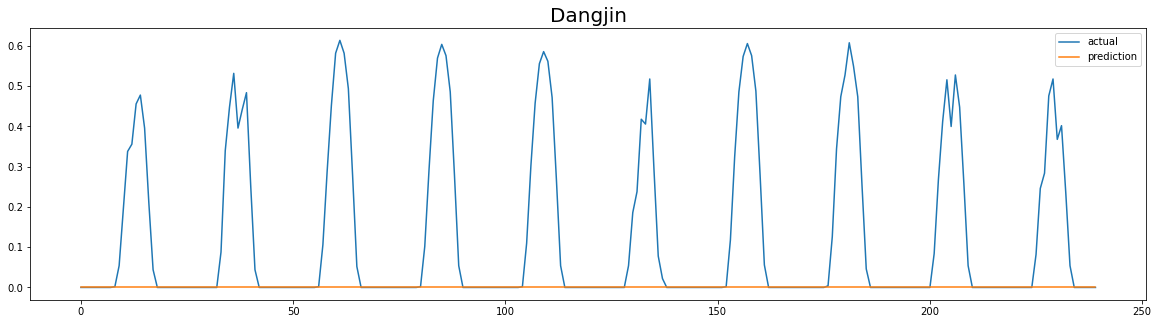

In [36]:
day = 50
day_range = 10

plt.figure(figsize=(20, 5))
plt.title('Dangjin', fontsize=20)
plt.plot(test_label[-day*24:-(day-day_range)*24], label = 'actual')
plt.plot(pred[-day*24:-(day-day_range)*24], label = 'prediction')
plt.legend()
plt.show()

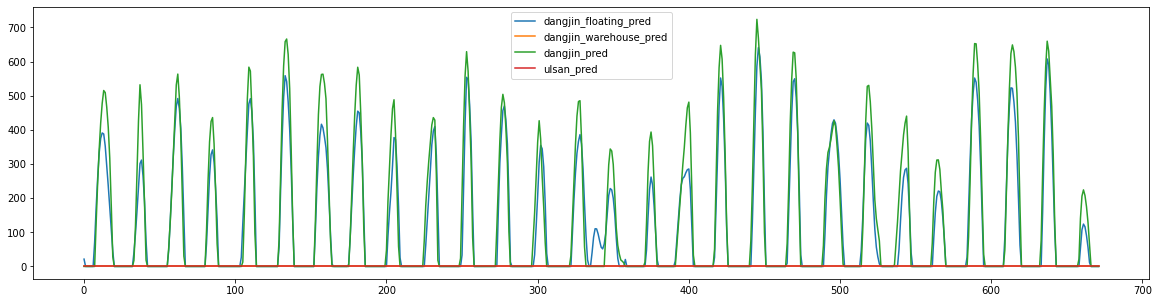

In [37]:
plt.figure(figsize=(20,5))
plt.plot(floating_pred * energy_floating.loc[0, 'capacity'], label = 'dangjin_floating_pred')
plt.plot(warehouse_pred * energy_warehouse.loc[0, 'capacity'], label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred * energy_dangjin.loc[0, 'capacity'], label = 'dangjin_pred')
plt.plot(ulsan_pred * energy_ulsan.loc[0, 'capacity'], label = 'ulsan_pred')
plt.legend()
plt.show()

In [38]:
submission = pd.read_csv('sample_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [ ]:
submission.iloc[:24*28, 1] = floating_pred * energy_floating.loc[0, 'capacity']
submission.iloc[:24*28, 2] = warehouse_pred * energy_warehouse.loc[0, 'capacity']
submission.iloc[:24*28, 3] = dangjin_pred * energy_dangjin.loc[0, 'capacity']
submission.iloc[:24*28, 4] = ulsan_pred * energy_ulsan.loc[0, 'capacity']

In [ ]:
submission.to_csv('submission.csv', index=False)
submission.head(48)